# Установка программы Metilene

In [1]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -b -p /usr/local

--2025-02-16 13:54:20--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154615621 (147M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 147.45M  88.3MB/s    in 1.7s    

2025-02-16 13:54:22 (88.3 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [154615621/154615621]

ERROR: File or directory already exists: '/usr/local'
If you want to update an existing installation, use the -u option.


In [2]:
!bash Miniconda3-latest-Linux-x86_64.sh -b -u -p /usr/local

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /usr/local


In [3]:
import os
os.environ["PATH"] = "/usr/local/bin:/usr/local/condabin:/usr/local/lib:$PATH"

In [4]:
!conda --version

conda 25.1.1


In [7]:
!conda config --add channels defaults
!conda config --add channels bioconda
!conda config --add channels conda-forge

In [8]:
!conda install -y metilene

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - metilene


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _r-mutex-1.0.1             |      anacondar_1           3 KB  conda-forge
    bedtools-2.27.1            |       h9a82719_5         702 KB  bioconda
    binutils_impl_linux-64-2.40|       h5293946_0         8.7 MB
    binutils_linux-64-2.40.0   |       hc2dff05_2          25 KB
    blas-1.1                   |         openblas           1 KB  conda-forge
    bwidget-1.10.1             |       ha770c72_0         126 KB  conda-forge
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    cairo-1.16.0               |       hb05425b_5         1.2 MB
    curl-8.11.1                |       hdbd6064_0          90 KB
    

In [9]:
!conda install -c bioconda metilene --no-deps -y

Channels:
 - bioconda
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - metilene


The following NEW packages will be INSTALLED:

  metilene           bioconda/linux-64::metilene-0.2.8-hec16e2b_2 




Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - done


In [10]:
!gunzip -c s_8_cell.deduplicated.bismark.cov.gz > s_8_cell.deduplicated.bismark.cov
!gunzip -c s_icm.deduplicated.bismark.cov.gz > s_icm.deduplicated.bismark.cov
!gunzip -c s_epiblast.deduplicated.bismark.cov.gz > s_epiblast.deduplicated.bismark.cov


/bin/bash: line 1: gunzip: command not found
/bin/bash: line 1: gunzip: command not found
/bin/bash: line 1: gunzip: command not found


In [11]:
import gzip
import shutil

def unzip_gz(input_gz, output_file):
    with gzip.open(input_gz, 'rt') as f_in, open(output_file, 'w') as f_out:
        shutil.copyfileobj(f_in, f_out)

unzip_gz("s_8_cell.deduplicated.bismark.cov.gz", "s_8_cell.deduplicated.bismark.cov")
unzip_gz("s_icm.deduplicated.bismark.cov.gz", "s_icm.deduplicated.bismark.cov")
unzip_gz("s_epiblast.deduplicated.bismark.cov.gz", "s_epiblast.deduplicated.bismark.cov")

print("Файлы успешно разархивированы!")

Файлы успешно разархивированы!


Добавляем инфорамцию из всех файлов в 1 для работы в программе Metilene

In [12]:
import pandas as pd

files = {
    "8cell": "s_8_cell.deduplicated.bismark.cov",
    "icm": "s_icm.deduplicated.bismark.cov",
    "epiblast": "s_epiblast.deduplicated.bismark.cov"
}

dfs = []
for sample, file in files.items():
    df = pd.read_csv(file, sep='\t', header=None, names=["chr", "start", "end", "meth_percent", "count_meth", "count_unmeth"])
    df["sample"] = sample
    df = df[["chr", "start", "meth_percent", "sample"]]
    dfs.append(df)

# Объединяем по CpG-позициям
merged_df = pd.concat(dfs)
pivot_df = merged_df.pivot(index=["chr", "start"], columns="sample", values="meth_percent").reset_index()

pivot_df.to_csv("methylation_data_metilene.tsv", sep='\t', index=False, na_rep="NA")
print("Файл готов: methylation_data_metilene.tsv")

Файл готов: methylation_data_metilene.tsv


## Дифференциально метилированные участки (DMR)

Запуск Metilene попарно

In [27]:
!metilene -m 5 -d 0.2 -t 4 -a "8cell" -b "icm" methylation_data_metilene.tsv > DMR_results_8cell_icm.txt


Выходные данные были обрезаны до нескольких последних строк (5000).
segmenting chr11-[113295889,113296320], 19 CpGs
segmenting chr11-[113296825,113297944], 32 CpGs
segmenting chr11-[113298394,113301596], 91 CpGs
segmenting chr11-[113301944,113304218], 61 CpGs
segmenting chr11-[113304596,113305044], 9 CpGs
segmenting chr11-[113305382,113306153], 26 CpGs
segmenting chr11-[113306729,113308320], 33 CpGs
segmenting chr11-[113308648,113309056], 8 CpGs
segmenting chr11-[113309491,113312861], 128 CpGs
segmenting chr11-[113313215,113313646], 22 CpGs
segmenting chr11-[113313995,113315104], 23 CpGs
segmenting chr11-[113315424,113317239], 37 CpGs
segmenting chr11-[113317575,113318720], 34 CpGs
segmenting chr11-[113319039,113327484], 219 CpGs
segmenting chr11-[113327898,113329468], 40 CpGs
segmenting chr11-[113329893,113330954], 35 CpGs
segmenting chr11-[113331520,113336167], 112 CpGs
segmenting chr11-[113336476,113337746], 35 CpGs
segmenting chr11-[113338140,113338879], 28 CpGs
segmenting chr11-[1

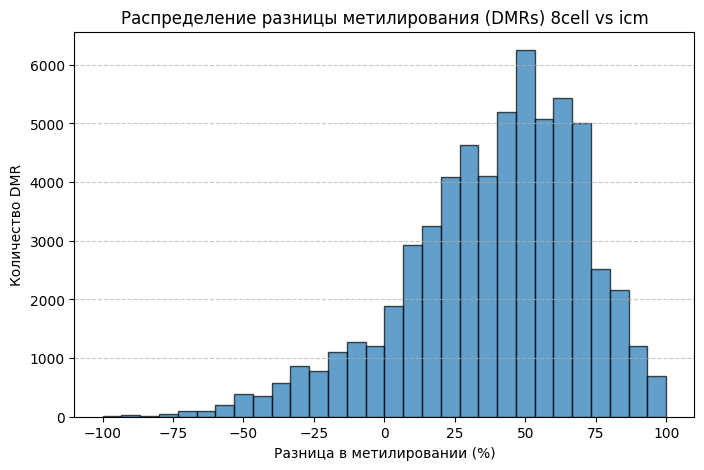

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("DMR_results_8cell_icm.txt", sep="\t", header=None,
                 names=["chr", "start", "end", "mode", "meanMethDiff", "CpGs", "p_value", "FDR", "meth_A", "meth_B"])

plt.figure(figsize=(8, 5))
plt.hist(df["meanMethDiff"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Разница в метилировании (%)")
plt.ylabel("Количество DMR")
plt.title("Распределение разницы метилирования (DMRs) 8cell vs icm")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [22]:
!metilene -m 5 -d 0.2 -t 4 -a "8cell" -b "epiblast" methylation_data_metilene.tsv > DMR_results_8cell_epiblast.txt

Выходные данные были обрезаны до нескольких последних строк (5000).
segmenting chr11-[112774189,112774779], 5 CpGs
segmenting chr11-[112775110,112775886], 19 CpGs
segmenting chr11-[112776309,112776656], 6 CpGs
segmenting chr11-[112776970,112778013], 38 CpGs
segmenting chr11-[112778385,112781371], 60 CpGs
segmenting chr11-[112781945,112781945], 1 CpGs
segmenting chr11-[112782320,112784960], 49 CpGs
segmenting chr11-[112785314,112785315], 2 CpGs
segmenting chr11-[112785639,112786140], 10 CpGs
segmenting chr11-[112786546,112787109], 8 CpGs
segmenting chr11-[112787411,112787523], 4 CpGs
segmenting chr11-[112788449,112789672], 17 CpGs
segmenting chr11-[112789987,112791651], 35 CpGs
segmenting chr11-[112791957,112791971], 2 CpGs
segmenting chr11-[112792516,112793560], 23 CpGs
segmenting chr11-[112793915,112797305], 104 CpGs
segmenting chr11-[112797770,112798066], 11 CpGs
segmenting chr11-[112798439,112798553], 10 CpGs
segmenting chr11-[112799037,112800282], 33 CpGs
segmenting chr11-[11280081

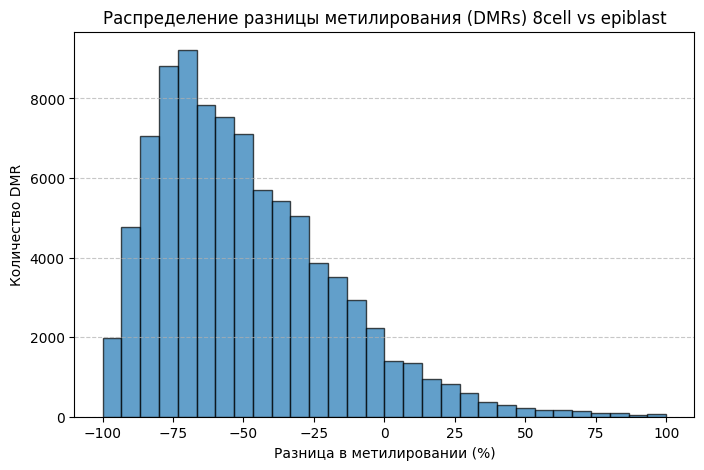

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("DMR_results.txt", sep="\t", header=None,
                 names=["chr", "start", "end", "mode", "meanMethDiff", "CpGs", "p_value", "FDR", "meth_A", "meth_B"])

plt.figure(figsize=(8, 5))
plt.hist(df["meanMethDiff"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Разница в метилировании (%)")
plt.ylabel("Количество DMR")
plt.title("Распределение разницы метилирования (DMRs) 8cell vs epiblast")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [25]:
!metilene -m 5 -d 0.2 -t 4 -a "icm" -b "epiblast" methylation_data_metilene.tsv > DMR_results_icm_epiblast.txt

Выходные данные были обрезаны до нескольких последних строк (5000).
segmenting chr11-[111966190,111966673], 8 CpGs
segmenting chr11-[111967378,111967926], 12 CpGs
segmenting chr11-[111968402,111968403], 2 CpGs
segmenting chr11-[111968924,111969071], 4 CpGs
segmenting chr11-[111969521,111970255], 18 CpGs
segmenting chr11-[111970593,111970593], 1 CpGs
segmenting chr11-[111970973,111971499], 8 CpGs
segmenting chr11-[111971819,111972805], 20 CpGs
segmenting chr11-[111973149,111974947], 24 CpGs
segmenting chr11-[111975258,111975259], 2 CpGs
segmenting chr11-[111975705,111975955], 4 CpGs
segmenting chr11-[111976293,111976636], 5 CpGs
segmenting chr11-[111977029,111977030], 2 CpGs
segmenting chr11-[111977523,111977523], 1 CpGs
segmenting chr11-[111977897,111978062], 5 CpGs
segmenting chr11-[111978436,111979070], 16 CpGs
segmenting chr11-[111979611,111979662], 3 CpGs
segmenting chr11-[111979975,111982050], 43 CpGs
segmenting chr11-[111982733,111984182], 34 CpGs
segmenting chr11-[111984541,1119

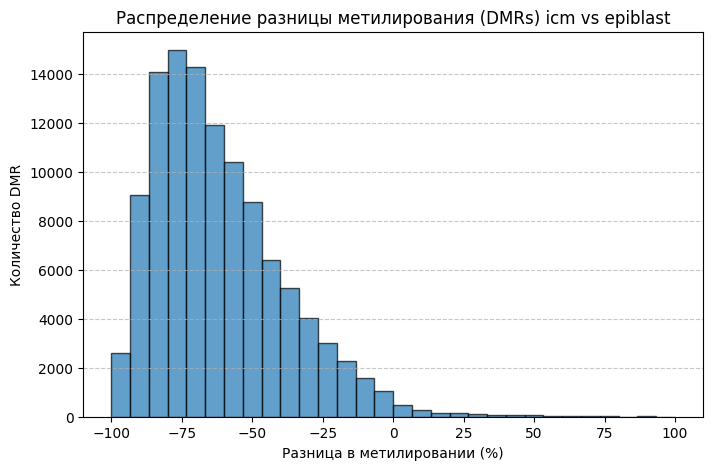

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("DMR_results_icm_epiblast.txt", sep="\t", header=None,
                 names=["chr", "start", "end", "mode", "meanMethDiff", "CpGs", "p_value", "FDR", "meth_A", "meth_B"])

plt.figure(figsize=(8, 5))
plt.hist(df["meanMethDiff"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Разница в метилировании (%)")
plt.ylabel("Количество DMR")
plt.title("Распределение разницы метилирования (DMRs) icm vs epiblast")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Дифференциально метилированные цитозины (DMC)

In [31]:
!metilene -m 1 -d 0.2 -t 4 -f 3 -a "8cell" -b "icm" methylation_data_metilene.tsv > DMC_results_8cell_vs_ICM.txt


Выходные данные были обрезаны до нескольких последних строк (5000).
CpG testing chr11-[121437725]
CpG testing chr11-[121437726]
CpG testing chr11-[121437803]
CpG testing chr11-[121437969]
CpG testing chr11-[121437984]
CpG testing chr11-[121437991]
CpG testing chr11-[121438153]
CpG testing chr11-[121438154]
CpG testing chr11-[121438321]
CpG testing chr11-[121438322]
CpG testing chr11-[121438386]
CpG testing chr11-[121438387]
CpG testing chr11-[121438435]
CpG testing chr11-[121438436]
CpG testing chr11-[121438443]
CpG testing chr11-[121438444]
CpG testing chr11-[121438815]
CpG testing chr11-[121438816]
CpG testing chr11-[121438860]
CpG testing chr11-[121438861]
CpG testing chr11-[121438880]
CpG testing chr11-[121438881]
CpG testing chr11-[121438958]
CpG testing chr11-[121438959]
CpG testing chr11-[121439195]
CpG testing chr11-[121439256]
CpG testing chr11-[121439257]
CpG testing chr11-[121439258]
CpG testing chr11-[121439259]
CpG testing chr11-[121439327]
CpG testing chr11-[121439328]
Cp

In [33]:
import pandas as pd

file_path = "DMC_results_8cell_vs_ICM.txt"
df = pd.read_csv(file_path, sep="\t", header=None)

print("Количество колонок:", df.shape[1])
print(df.head())  # Вывод первых строк файла


Количество колонок: 10
       0        1        2  3          4  5  6  7       8       9
0  chr11  3050030  3050031  1  16.666667  1  1  .  50.000  33.333
1  chr11  3050047  3050048  1  16.666667  1  1  .  66.667  50.000
2  chr11  3050048  3050049  1  -7.142857  1  1  .  50.000  57.143
3  chr11  3050224  3050225  1  30.606061  1  1  .  53.333  22.727
4  chr11  3050285  3050286  1  41.666667  1  1  .  66.667  25.000


In [42]:
import pandas as pd

file_path = "DMC_results_8cell_vs_ICM.txt"
df = pd.read_csv(file_path, sep="\t", header=None)

df.columns = ["chr", "start", "end", "strand", "meth_diff", "cpg_count", "p-value", "q-value", "8cell_methyl", "icm_methyl"]
df = df.drop(columns=["q-value"])

print(df.head())


     chr    start      end  strand  meth_diff  cpg_count  p-value  \
0  chr11  3050030  3050031       1  16.666667          1        1   
1  chr11  3050047  3050048       1  16.666667          1        1   
2  chr11  3050048  3050049       1  -7.142857          1        1   
3  chr11  3050224  3050225       1  30.606061          1        1   
4  chr11  3050285  3050286       1  41.666667          1        1   

   8cell_methyl  icm_methyl  
0        50.000      33.333  
1        66.667      50.000  
2        50.000      57.143  
3        53.333      22.727  
4        66.667      25.000  


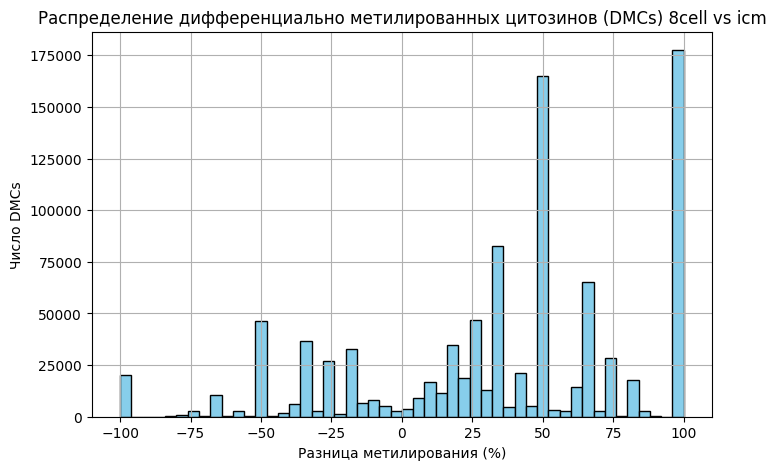

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df["meth_diff"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Разница метилирования (%)")
plt.ylabel("Число DMCs")
plt.title("Распределение дифференциально метилированных цитозинов (DMCs) 8cell vs icm")
plt.grid()
plt.show()


In [36]:
!metilene -m 1 -d 0.2 -t 4 -f 3 -a "8cell" -b "epiblast" methylation_data_metilene.tsv > DMC_results_8cell_vs_epiblast.txt

Выходные данные были обрезаны до нескольких последних строк (5000).
CpG testing chr11-[121455658]
CpG testing chr11-[121455737]
CpG testing chr11-[121455738]
CpG testing chr11-[121455742]
CpG testing chr11-[121455758]
CpG testing chr11-[121455759]
CpG testing chr11-[121455783]
CpG testing chr11-[121455784]
CpG testing chr11-[121456073]
CpG testing chr11-[121456078]
CpG testing chr11-[121456117]
CpG testing chr11-[121456139]
CpG testing chr11-[121456180]
CpG testing chr11-[121456306]
CpG testing chr11-[121456307]
CpG testing chr11-[121456817]
CpG testing chr11-[121456818]
CpG testing chr11-[121457013]
CpG testing chr11-[121457014]
CpG testing chr11-[121457109]
CpG testing chr11-[121457132]
CpG testing chr11-[121457238]
CpG testing chr11-[121457239]
CpG testing chr11-[121457317]
CpG testing chr11-[121457606]
CpG testing chr11-[121457607]
CpG testing chr11-[121457753]
CpG testing chr11-[121457754]
CpG testing chr11-[121458409]
CpG testing chr11-[121458514]
CpG testing chr11-[121458812]
Cp

     chr    start      end  strand  meth_diff  cpg_count  p-value  \
0  chr11  3050030  3050031       1 -25.000000          1        1   
1  chr11  3050048  3050049       1 -50.000000          1        1   
2  chr11  3050047  3050048       1 -33.333333          1        1   
3  chr11  3050223  3050224       1  -9.375000          1        1   
4  chr11  3050285  3050286       1 -26.666667          1        1   

   8cell_methyl  icm_methyl  
0        50.000      75.000  
1        50.000     100.000  
2        66.667     100.000  
3        87.500      96.875  
4        66.667      93.333  


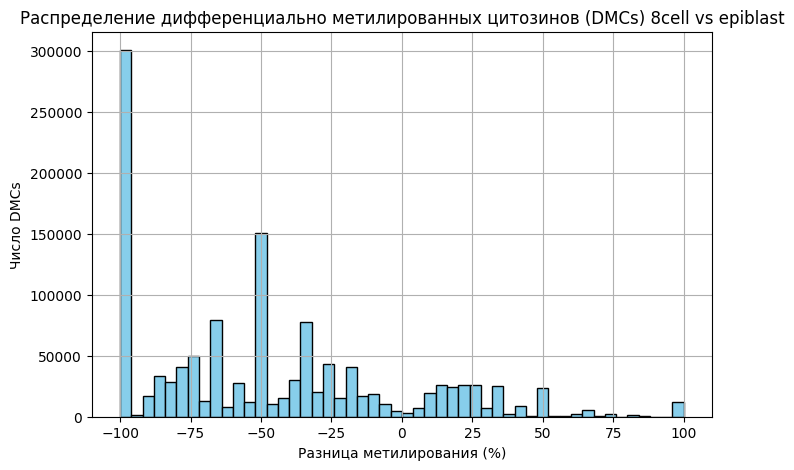

In [40]:
import pandas as pd

file_path = "DMC_results_8cell_vs_epiblast.txt"
df = pd.read_csv(file_path, sep="\t", header=None)

df.columns = ["chr", "start", "end", "strand", "meth_diff", "cpg_count", "p-value", "q-value", "8cell_methyl", "icm_methyl"]

df = df.drop(columns=["q-value"])

print(df.head())

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df["meth_diff"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Разница метилирования (%)")
plt.ylabel("Число DMCs")
plt.title("Распределение дифференциально метилированных цитозинов (DMCs) 8cell vs epiblast")
plt.grid()
plt.show()

In [38]:
!metilene -m 1 -d 0.2 -t 4 -f 3 -a "icm" -b "epiblast" methylation_data_metilene.tsv > DMC_results_icm_vs_epiblast.txt

Выходные данные были обрезаны до нескольких последних строк (5000).
CpG testing chr11-[121500486]
CpG testing chr11-[121500516]
CpG testing chr11-[121500517]
CpG testing chr11-[121500639]
CpG testing chr11-[121500721]
CpG testing chr11-[121500722]
CpG testing chr11-[121500810]
CpG testing chr11-[121500823]
CpG testing chr11-[121500836]
CpG testing chr11-[121500857]
CpG testing chr11-[121500872]
CpG testing chr11-[121501412]
CpG testing chr11-[121501413]
CpG testing chr11-[121501699]
CpG testing chr11-[121501700]
CpG testing chr11-[121501783]
CpG testing chr11-[121501784]
CpG testing chr11-[121502238]
CpG testing chr11-[121502313]
CpG testing chr11-[121502314]
CpG testing chr11-[121502423]
CpG testing chr11-[121502441]
CpG testing chr11-[121502456]
CpG testing chr11-[121502493]
CpG testing chr11-[121502494]
CpG testing chr11-[121502521]
CpG testing chr11-[121502522]
CpG testing chr11-[121502527]
CpG testing chr11-[121502528]
CpG testing chr11-[121502547]
CpG testing chr11-[121502548]
Cp

     chr    start      end  strand  meth_diff  cpg_count  p-value  \
0  chr11  3050030  3050031       1 -41.666667          1        1   
1  chr11  3050047  3050048       1 -50.000000          1        1   
2  chr11  3050031  3050032       1 -50.000000          1        1   
3  chr11  3050223  3050224       1 -60.511364          1        1   
4  chr11  3050048  3050049       1 -42.857143          1        1   

   8cell_methyl  icm_methyl  
0        33.333      75.000  
1        50.000     100.000  
2        50.000     100.000  
3        36.364      96.875  
4        57.143     100.000  


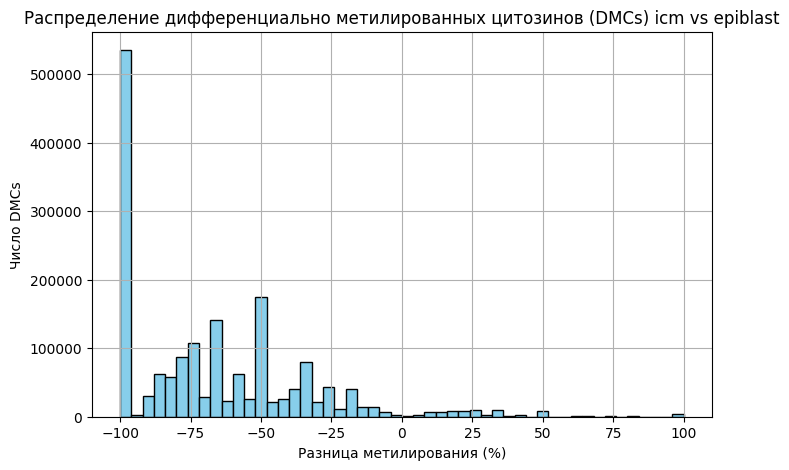

In [41]:
import pandas as pd

file_path = "DMC_results_icm_vs_epiblast.txt"
df = pd.read_csv(file_path, sep="\t", header=None)

df.columns = ["chr", "start", "end", "strand", "meth_diff", "cpg_count", "p-value", "q-value", "8cell_methyl", "icm_methyl"]

df = df.drop(columns=["q-value"])

print(df.head())

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df["meth_diff"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Разница метилирования (%)")
plt.ylabel("Число DMCs")
plt.title("Распределение дифференциально метилированных цитозинов (DMCs) icm vs epiblast")
plt.grid()
plt.show()